In [1]:
include("./main_parser.jl")

draw_hg (generic function with 1 method)

In [2]:
using PyCall, BSON, DecisionTree, Random

In [3]:
BSON.@load "models/model_rf.bson" rf

spacy = pyimport("spacy")

nlp = spacy.load("en_core_web_lg")

PyObject <spacy.lang.en.English object at 0x7f0ece7b3f90>

In [4]:
doc = nlp("Dollar climbs as inflation builds case for higher rates")
hg, atoms_tokens = beta(patterns, doc, alpha(doc, rf), true)

(Union{Nothing, Float64}[nothing nothing … nothing 1.0; nothing nothing … nothing 1.0; … ; 1.0 1.0 … 1.0 1.0; 1.0 1.0 … 1.0 1.0], Dict{Vector{String}, Vector{PyObject}}(["C", "P", "T", "C", "P", "C", "B", "C"] => [PyObject Dollar, PyObject climbs, PyObject as, PyObject inflation, PyObject builds, PyObject case, PyObject for, PyObject [higher, rates]], ["R"] => [PyObject [Dollar, climbs, [as, [inflation, builds, [case, for, [higher, rates]]]]]], ["C", "P", "T", "R"] => [PyObject Dollar, PyObject climbs, PyObject as, PyObject [inflation, builds, [case, for, [higher, rates]]]], ["C", "P", "S"] => [PyObject Dollar, PyObject climbs, PyObject [as, [inflation, builds, [case, for, [higher, rates]]]]], ["C", "P", "T", "C", "P", "C"] => [PyObject Dollar, PyObject climbs, PyObject as, PyObject inflation, PyObject builds, PyObject [case, for, [higher, rates]]], ["C", "P", "T", "C", "P", "C", "B", "M", "C"] => [PyObject Dollar, PyObject climbs, PyObject as, PyObject inflation, PyObject builds, PyOb

In [5]:
atoms_tokens[["C", "P", "S"]]

3-element Vector{PyObject}:
 PyObject Dollar
 PyObject climbs
 PyObject [as, [inflation, builds, [case, for, [higher, rates]]]]

In [6]:
doc = nlp("Dollar edges down as traders await US jobs data")
hg, tokens = beta(patterns, doc, alpha(doc, rf), true)

(Union{Nothing, Float64}[nothing nothing nothing 1.0; nothing nothing nothing 1.0; … ; 1.0 1.0 1.0 1.0; 1.0 1.0 1.0 1.0], Dict{Vector{String}, Vector{PyObject}}(["C", "P", "M", "S"] => [PyObject Dollar, PyObject edges, PyObject down, PyObject [as, [traders, await, US, jobs, data]]], ["C", "P", "M", "T", "R"] => [PyObject Dollar, PyObject edges, PyObject down, PyObject as, PyObject [traders, await, US, jobs, data]], ["C", "P", "M", "T", "C", "P", "C", "C", "C"] => [PyObject Dollar, PyObject edges, PyObject down, PyObject as, PyObject traders, PyObject await, PyObject US, PyObject jobs, PyObject data], ["R"] => [PyObject [Dollar, edges, [down, [as, [traders, await, US, jobs, data]]]]], ["C", "P", "S"] => [PyObject Dollar, PyObject edges, PyObject [down, [as, [traders, await, US, jobs, data]]]]))

In [7]:
hg

9×4 Hypergraph{Float64, Nothing, Nothing, Dict{Int64, Float64}}:
  nothing   nothing   nothing  1.0
  nothing   nothing   nothing  1.0
  nothing   nothing  1.0       1.0
  nothing  1.0       1.0       1.0
 1.0       1.0       1.0       1.0
 1.0       1.0       1.0       1.0
 1.0       1.0       1.0       1.0
 1.0       1.0       1.0       1.0
 1.0       1.0       1.0       1.0

In [8]:
keys(tokens)

KeySet for a Dict{Vector{String}, Vector{PyObject}} with 5 entries. Keys:
  ["C", "P", "M", "S"]
  ["C", "P", "M", "T", "R"]
  ["C", "P", "M", "T", "C", "P", "C", "C", "C"]
  ["R"]
  ["C", "P", "S"]

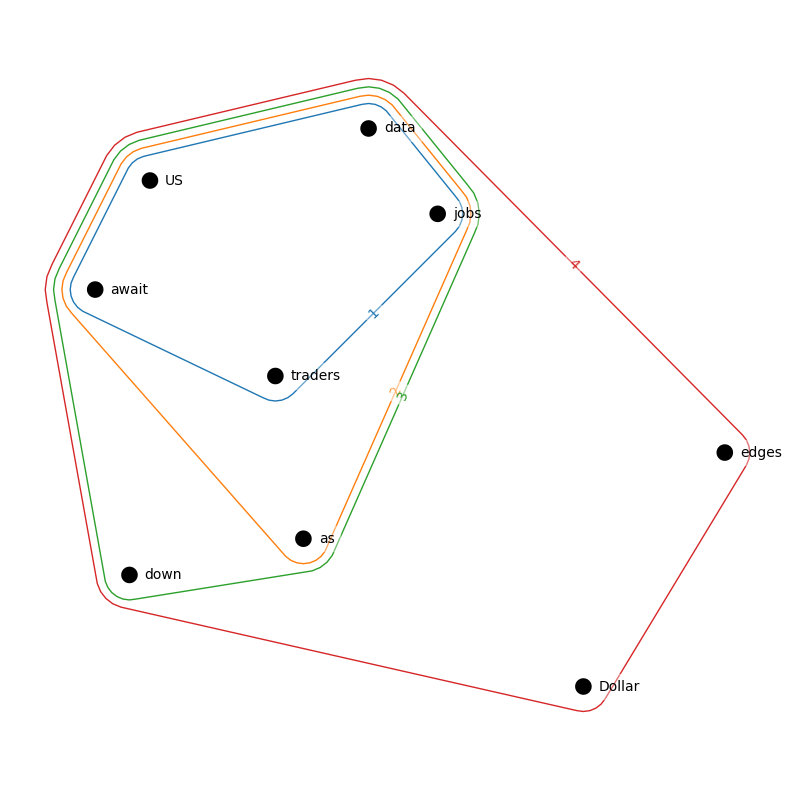

Dict(5 => "traders", 4 => "as", 6 => "await", 7 => "US", 2 => "edges", 9 => "data", 8 => "jobs", 3 => "down", 1 => "Dollar")

In [9]:
draw_hg(hg, doc)

In [10]:
doc = nlp("Dollar rebounds after improving jobs")
hg, tokens = beta(patterns, doc, alpha(doc, rf), true)

(Union{Nothing, Float64}[nothing nothing 1.0; nothing nothing 1.0; … ; 1.0 1.0 1.0; 1.0 1.0 1.0], Dict{Vector{String}, Vector{PyObject}}(["R"] => [PyObject [Dollar, rebounds, [after, [improving, jobs]]]], ["C", "P", "T", "P", "C"] => [PyObject Dollar, PyObject rebounds, PyObject after, PyObject improving, PyObject jobs], ["C", "P", "T", "R"] => [PyObject Dollar, PyObject rebounds, PyObject after, PyObject [improving, jobs]], ["C", "P", "S"] => [PyObject Dollar, PyObject rebounds, PyObject [after, [improving, jobs]]]))

In [11]:
keys(tokens)

KeySet for a Dict{Vector{String}, Vector{PyObject}} with 4 entries. Keys:
  ["R"]
  ["C", "P", "T", "P", "C"]
  ["C", "P", "T", "R"]
  ["C", "P", "S"]

In [12]:
tokens[["C", "P", "S"]]

3-element Vector{PyObject}:
 PyObject Dollar
 PyObject rebounds
 PyObject [after, [improving, jobs]]

In [45]:
function get_hg_tokens(text)
    doc = nlp(text)
#     hg, tokens = nothing
    try
        beta(patterns, doc, alpha(doc, rf))
    catch e
        return nothing
    end
#     return hg, tokens
end

get_hg_tokens (generic function with 1 method)

In [53]:
hg, tokens = get_hg_tokens("Dollar holds gains as coronavirus woes sap confidence");

In [55]:
keys(tokens)

KeySet for a Dict{Vector{String}, Vector{PyObject}} with 4 entries. Keys:
  ["C", "P", "C", "M", "C", "C", "P", "C"]
  ["C", "P", "C", "M", "R"]
  ["R"]
  ["C", "P", "C", "R"]

In [48]:
tokens[["C", "P", "C", "R"]]

4-element Vector{PyObject}:
 PyObject Dollar
 PyObject holds
 PyObject gains
 PyObject [as, [coronavirus, woes, sap, confidence]]

In [20]:
BSON.@load "articles.bson" articles

In [21]:
articles

1753-element Vector{Any}:
 "Dollar dips but shows biggest weekly gain in almost 3 months"
 "EURJPY Price Penetrates \$131 Level Downside, Targeting \$130 Level"
 "Column: Far from debasement, dollar hits overdrive"
 "Dollar Edges Lower; Remains Near 16-Month High"
 "NZ dollar drops below 70 level"
 "Dollar Near 16-Month High on Rates Hike Bets"
 "Dollar climbs after hot U.S. inflation; euro dips"
 "U.S. Dollar Continues to Gain Following Wednesday's Inflation Data "
 "De-Banking Crypto Traders Is More Sinister And Anti-Competitive -Aussie Senator Bragg"
 "Euro US Dollar (EUR/USD) Exchange Rate Hits Low as USD Soars"
 "Dollar Climbs to 2021 Highs; U.S. CPI Points to Early Fed Hikes"
 "Aussie dips below 73 on soft jobs report"
 "Dollar Up, Boosted by Highest U.S. Inflation in a Generation"
 ⋮
 "Threat to Dollar’s Global Supremacy Revived by EU Stimulus Deal"
 "Euro Rises to Nearly 19-Month High on Historical EU Fiscal Package"
 "Euro Is Turning Into ‘Credible’ Safe Haven After EU Rescue 

In [63]:
output = Dict(i => get_hg_tokens(articles[i]) for i in 1:length(articles))

Dict{Int64, Union{Nothing, Tuple{Hypergraph{Float64, Nothing, Nothing, Dict{Int64, Float64}}, Dict{Vector{String}, Vector{PyObject}}}}} with 1753 entries:
  1144 => (Union{Nothing, Float64}[nothing nothing 1.0 1.0; nothing nothing 1.0…
  1175 => (Union{Nothing, Float64}[nothing 1.0 1.0; nothing 1.0 1.0; … ; 1.0 no…
  719  => (Union{Nothing, Float64}[nothing nothing … 1.0 1.0; nothing nothing ……
  1546 => (Union{Nothing, Float64}[1.0 nothing nothing 1.0; 1.0 nothing nothing…
  1703 => (Union{Nothing, Float64}[nothing nothing nothing 1.0; nothing nothing…
  1028 => (Union{Nothing, Float64}[1.0 nothing … nothing 1.0; 1.0 nothing … not…
  699  => (Union{Nothing, Float64}[1.0 1.0 … nothing 1.0; 1.0 1.0 … nothing 1.0…
  831  => (Union{Nothing, Float64}[nothing nothing … 1.0 1.0; nothing nothing ……
  1299 => (Union{Nothing, Float64}[nothing 1.0 nothing 1.0; 1.0 1.0 nothing 1.0…
  1438 => (Union{Nothing, Float64}[nothing nothing … nothing 1.0; nothing nothi…
  1074 => (Union{Nothing, Float64}[

In [64]:
results = []

Any[]

In [66]:
pat = ["C", "P", "S"]
for (key, value) in output
    if !(value == nothing)
        if pat in keys(value[2])
            append!(results, (key, value[2][pat]))
        end
    end
end

In [67]:
results

76-element Vector{Any}:
 1388
     PyObject[PyObject Dollar, PyObject steadies, PyObject [as, [markets, await, [Trump, -, Biden, debate]]]]
 1157
     PyObject[PyObject Pound, PyObject Jumps, PyObject [as, [Brexit, Deal, Nears, Landing]]]
 1528
     PyObject[PyObject Dollar, PyObject hunkers, PyObject [down, [before, [key, [U.S., jobs, report]]]]]
  702
     PyObject[PyObject Dollar, PyObject Weakens, PyObject [After, [Inflation, Data, Calms, Tapering, Fears]]]
 1009
     PyObject[PyObject Pound, PyObject Shrugs, PyObject [off, [Further, Covid, Restrictions, as, UK, Backs, Brexit, Deal]]]
 1177
     PyObject[PyObject Euro, PyObject Slips, PyObject [as, [[ECB, 's, Lagarde], Drops, [[Further, Hint, of], Easing]]]]
  609
    ⋮
 1346
     PyObject[PyObject Dollar, PyObject Muted, PyObject [as, [[Safe, -, Haven, Demand], Fades, [on, [Stimulus, Hopes]]]]]
  423
     PyObject[PyObject Dollar, PyObject declines, PyObject [as, [[Fed, 's, Powell], maintains, [dovish, message]]]]
  559
     PyObj